![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/sentence_embeddings/NLU_BERT_sentence_embeddings_and_t-SNE_visualization_Example.ipynb)

# BERT Sentence Embeddings with NLU 

BERT (Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture.



## Sources :
- https://arxiv.org/abs/1810.04805
- https://github.com/google-research/bert

## Paper abstract

We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement).



# 1. Install Java and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-01 22:16:07--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-01 22:16:07 (33.9 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
     |████████████████████████████████| 204.8MB 71kB/s 
     |████████████████████████████████| 153kB 46.4MB/s 
     |████████████████████████████████| 204kB 21.2MB/s 
     |████████████████████████████████| 204kB 34.6MB/s 


## 2. Load Model and embed sample sentence with BERT Sentence Embedder

In [ ]:
import nlu
pipe = nlu.load('embed_sentence.bert')
pipe.predict('He was suprised by the diversity of NLU')

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,sentence,sentence_embedding_bert
0,He was suprised by the diversity of NLU,[He was suprised by the diversity of NLU],"[[-1.0726687908172607, 0.4481307566165924, -0...."


# 3. Download Sample dataset

In [ ]:
import pandas as pd
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
# Load dataset to Pandas
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')
df

--2021-05-01 22:18:41--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.18.142
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.18.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  95.3MB/s    in 2.6s    

2021-05-01 22:18:43 (95.3 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


# 4.1 Visualize Embeddings with T-SNE




Lets add Sentiment and Part Of Speech to our pipeline because its so easy and so we can hue our T-SNE plots by POS and Sentiment       

In [ ]:
pipe = nlu.load('pos sentiment embed_sentence.bert') # emotion
df['text'] = df['comment']

# We must set output level to sentence since NLU will infer a different output level for this pipeline composition
predictions = pipe.predict(df[['text','label']].iloc[0:500], output_level='sentence')
predictions

pos_anc download started this may take some time.
Approximate size to download 3.9 MB
[OK!]
analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]
sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]


,sentence,pos,spell,sentiment,sentiment_confidence,sentence_embedding_bert
0,NC and NH.,"[NNP, CC, NNP, .]","[NC, and, NH, .]",negative,0.5229,"[-1.059532642364502, 0.9238302707672119, -1.06..."
1,You do know west teams play against west teams...,"[PRP, VBP, VB, NN, NNS, VBP, IN, NN, NNS, JJR,...","[You, do, know, west, teams, play, against, we...",negative,0.4733,"[-0.9636414647102356, -0.046410106122493744, -..."
2,"They were underdogs earlier today, but since G...","[PRP, VBD, NNS, RBR, NN, ,, CC, IN, NNP, NN, D...","[They, were, underdogs, earlier, today, ,, but...",negative,0.5118,"[-0.6074598431587219, 0.13940860331058502, -0...."
3,"This meme isn't funny none of the ""new york ni...","[DT, NN, NN, JJ, NN, IN, DT, '', JJ, NNP, NN, ...","[This, meme, isn't, funny, none, of, the, "", n...",negative,0.5155,"[-0.6330281496047974, 0.13020245730876923, 0.0..."
4,I could use one of those tools.,"[PRP, MD, VB, CD, IN, DT, NNS, .]","[I, could, use, one, of, those, tools, .]",negative,0.4745,"[-1.3357948064804077, 1.081745982170105, -0.41..."
...,...,...,...,...,...,...
495,"CS 1.6, Source and GO Cities skylines Getting ...","[NNP, CD, ,, NNP, CC, NNP, NNP, NNS, VBG, NN, ...","[CS, 1.6, ,, Source, and, GO, Cities, skylines...",positive,0.4526,"[-0.33594822883605957, -0.4027842581272125, -0..."
496,"Or a ""Your Welcome""","[CC, DT, '', PRP$, JJ, '']","[Or, a, "", Your, Welcome, ""]",negative,0.5927,"[-1.8244224786758423, 0.797812819480896, -0.53..."
497,But I want it to charge Super fast!,"[CC, PRP, VBP, PRP, TO, VB, NNP, RB, .]","[But, I, want, it, to, charge, Super, fast, !]",negative,0.4300,"[-1.131241798400879, 0.3491775691509247, -0.67..."
498,"Right, but I don't think it makes sense to com...","[RB, ,, CC, PRP, VBP, VB, PRP, VBZ, NN, TO, VB...","[Right, ,, but, I, don't, think, it, makes, se...",negative,0.5063,"[0.10539919137954712, 0.7969365119934082, -0.5..."


## 4.2 Checkout sentiment distribution

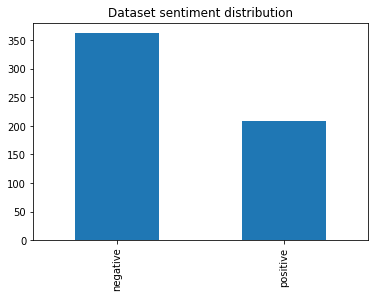

In [ ]:
# Some Tokens are None which we must drop first
predictions.dropna(how='any', inplace=True)
# Some sentiment are 'na' which we must drop first
predictions = predictions[predictions.sentiment!= 'na']
predictions.sentiment.value_counts().plot.bar(title='Dataset sentiment distribution')

# 5.Prepare data for T-SNE algorithm.
We create a Matrix with one row per Embedding vector for T-SNE algorithm

In [ ]:
import numpy as np

# Make a matrix from the vectors in the np_array column via list comprehension
mat = np.matrix([x for x in predictions.sentence_embedding_bert])

## 5.1 Fit and transform T-SNE algorithm


In [ ]:

from sklearn.manifold import TSNE
model = TSNE(n_components=2) #n_components means the lower dimension
low_dim_data = model.fit_transform(mat)
print('Lower dim data has shape',low_dim_data.shape)

Lower dim data has shape (571, 2)


### Set plotting styles

In [ ]:
# set some styles for for Plotting
import seaborn as sns
# Style Plots a bit
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 14)
import matplotlib.pyplot as plt1



##5.2 Plot low dimensional T-SNE BERT Sentence embeddings with hue for Sarcasm


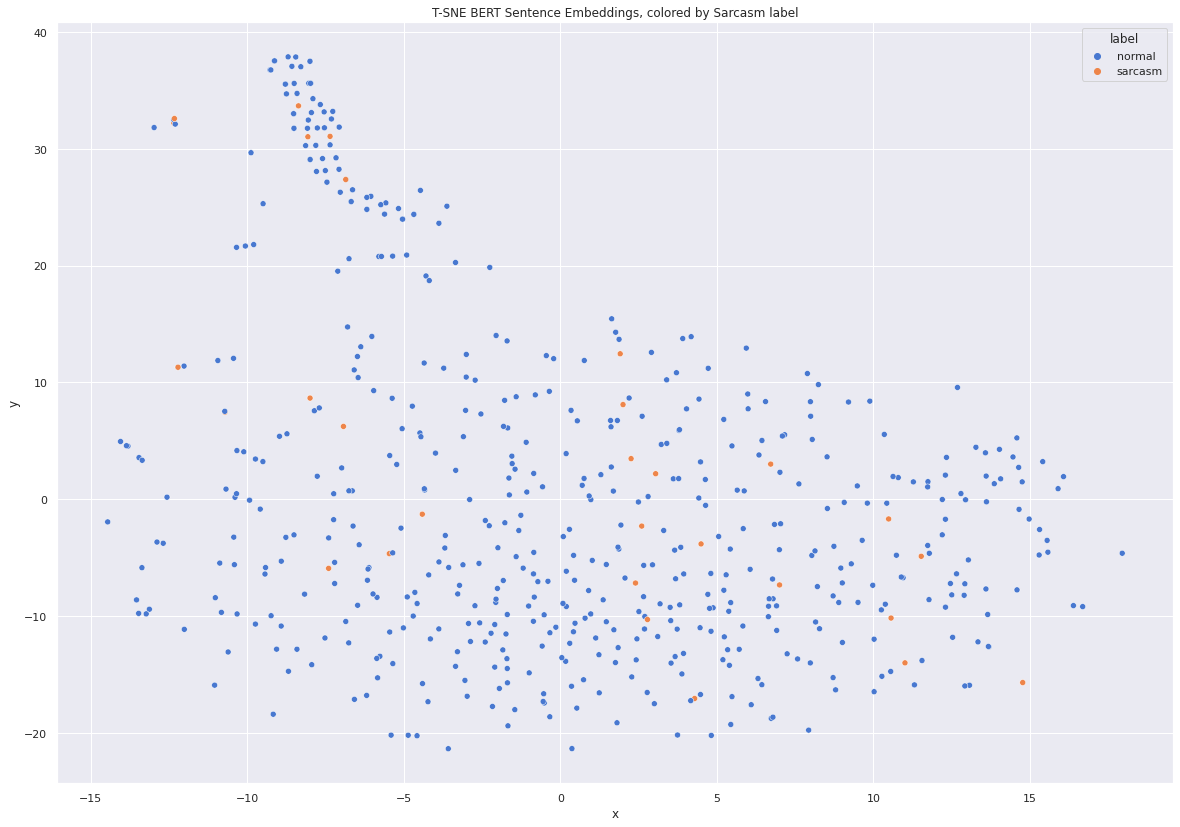

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, df.iloc[:low_dim_data.shape[0]].label.replace({1:'sarcasm',0:'normal'}))
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Sentence Embeddings, colored by Sarcasm label')
plt1.savefig("bert_sarcasam")


## 5.3 Plot low dimensional T-SNE BERT Sentence embeddings with hue for Sentiment


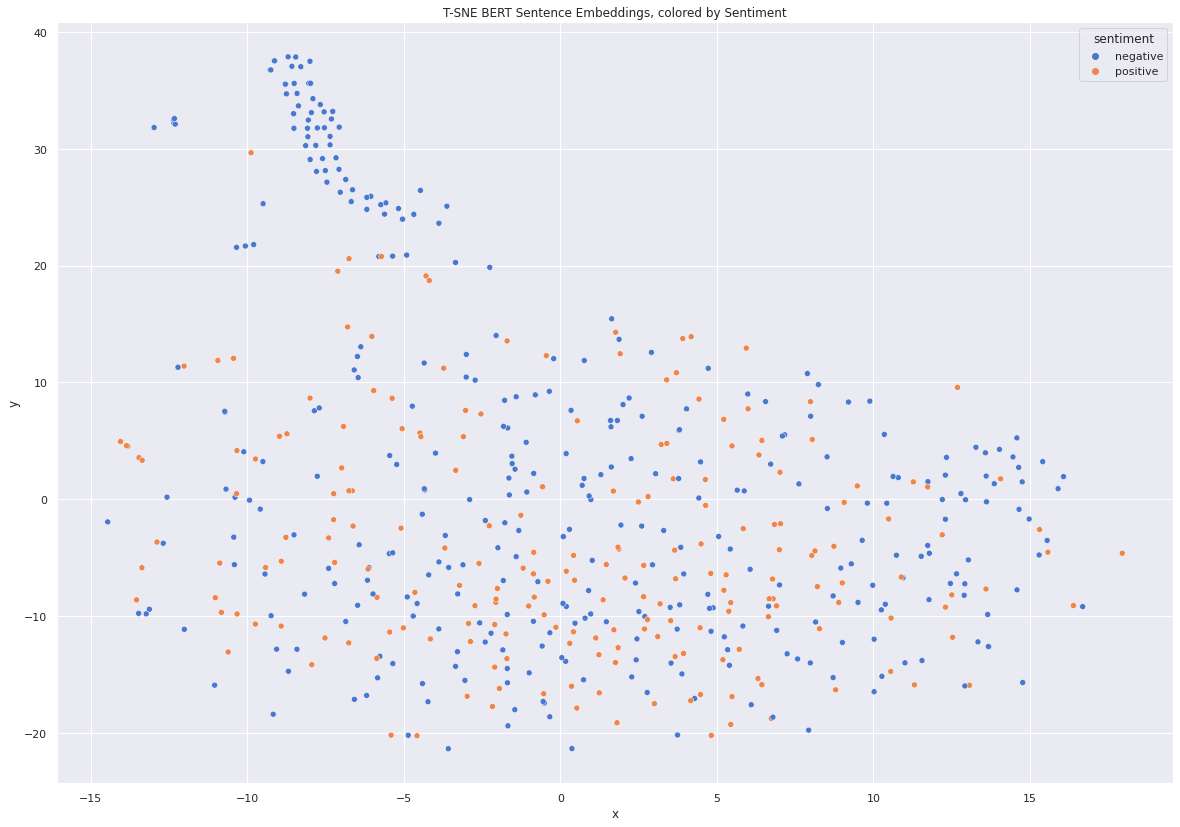

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.sentiment)
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Sentence Embeddings, colored by Sentiment')
plt1.savefig("bert_senitment")


# 6.1 Plot low dimensional T-SNE USE embeddings with hue for POS     
Because we will have a list of pos labels for each sentence, we need to explode on the pos column and then do the data peperation for T-SNE again before we can visualize with hue for POS


In [ ]:
predictions_exploded_on_pos = predictions.explode('pos')
predictions_exploded_on_pos

,sentence,pos,spell,sentiment,sentiment_confidence,sentence_embedding_bert
0,NC and NH.,NNP,"[NC, and, NH, .]",negative,0.5229,"[-1.059532642364502, 0.9238302707672119, -1.06..."
0,NC and NH.,CC,"[NC, and, NH, .]",negative,0.5229,"[-1.059532642364502, 0.9238302707672119, -1.06..."
0,NC and NH.,NNP,"[NC, and, NH, .]",negative,0.5229,"[-1.059532642364502, 0.9238302707672119, -1.06..."
0,NC and NH.,.,"[NC, and, NH, .]",negative,0.5229,"[-1.059532642364502, 0.9238302707672119, -1.06..."
1,You do know west teams play against west teams...,PRP,"[You, do, know, west, teams, play, against, we...",negative,0.4733,"[-0.9636414647102356, -0.046410106122493744, -..."
...,...,...,...,...,...,...
499,Hard drive requirements tend to include extra ...,IN,"[Hard, drive, requirements, tend, to, include,...",positive,0.5396,"[-0.8011002540588379, 1.111019253730774, -0.85..."
499,Hard drive requirements tend to include extra ...,DT,"[Hard, drive, requirements, tend, to, include,...",positive,0.5396,"[-0.8011002540588379, 1.111019253730774, -0.85..."
499,Hard drive requirements tend to include extra ...,NN,"[Hard, drive, requirements, tend, to, include,...",positive,0.5396,"[-0.8011002540588379, 1.111019253730774, -0.85..."
499,Hard drive requirements tend to include extra ...,VBG,"[Hard, drive, requirements, tend, to, include,...",positive,0.5396,"[-0.8011002540588379, 1.111019253730774, -0.85..."


## 6.2 Preprocess data for TSNE again

In [ ]:

# Make a matrix from the vectors in the np_array column via list comprehension
mat = np.matrix([x for x in predictions_exploded_on_pos.sentence_embedding_bert])


from sklearn.manifold import TSNE
model = TSNE(n_components=2) #n_components means the lower dimension
low_dim_data = model.fit_transform(mat)
print('Lower dim data has shape',low_dim_data.shape)

Lower dim data has shape (7916, 2)


# 6.3 Plot low dimensional T-SNE BERT Sentence embeddings with hue for POS      


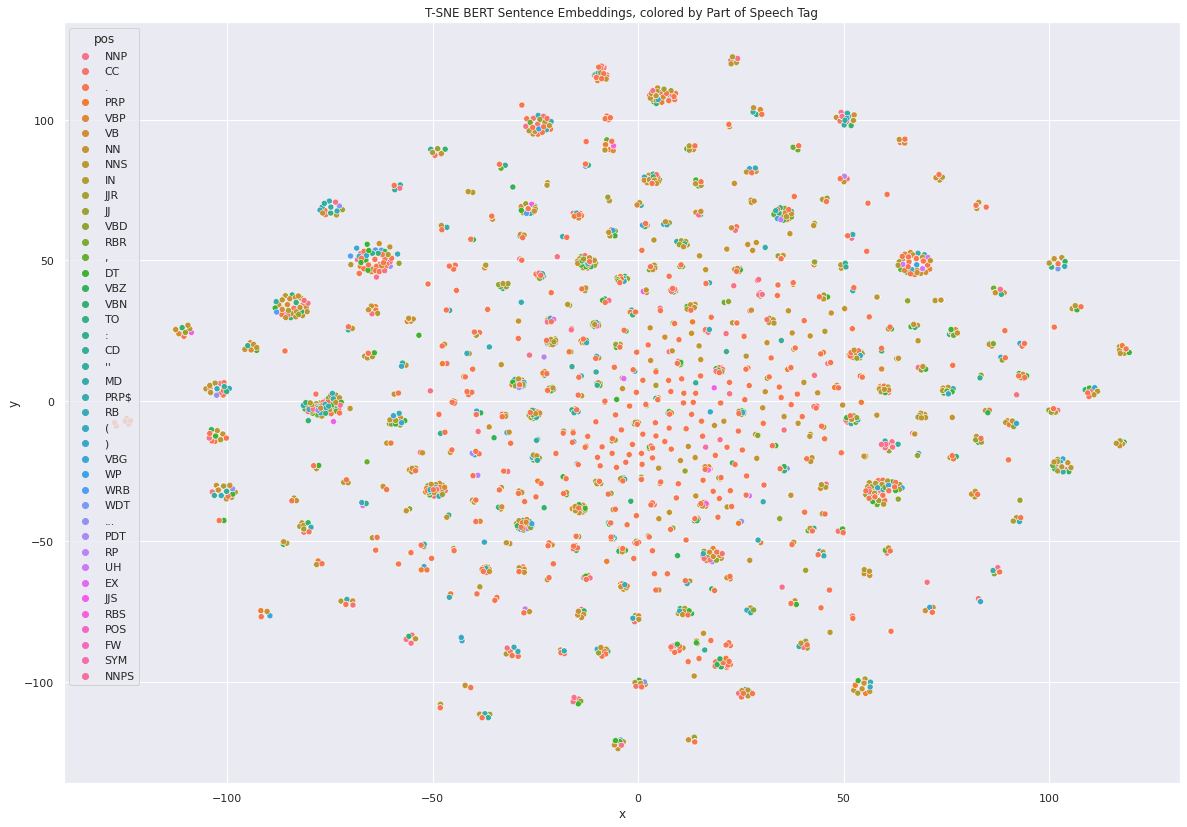

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions_exploded_on_pos.pos)
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Sentence Embeddings, colored by Part of Speech Tag')
plt1.savefig("bert_pos")


# 7. NLU has many more sentence embedding models!      
Make sure to try them all out!       
You can change 'embed_sentence.bert' in nlu.load('embed_sentence.bert') to bert, xlnet, albert or any other of the **20+ sentence embeddings** offerd by NLU

In [ ]:
nlu.print_all_model_kinds_for_action('embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc